# Import Libraries

In [1]:
import datetime
print("Model execution started at:" + datetime.datetime.today().ctime())

Model execution started at:Sat Apr 18 09:21:16 2020


In [2]:
from src.imports import *

%config IPCompleter.greedy=True
%reload_ext autoreload

In [3]:
%autoreload 2  # Autoreload all modules

In [4]:
def printgpuinfo():
    gpu_info = !nvidia-smi
    gpu_info = '\n'.join(gpu_info)
    if gpu_info.find('failed') >= 0:
      print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
      print('and then re-execute this cell.')
    else:
      print(gpu_info)
    
printgpuinfo()

Sat Apr 18 09:21:18 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64       Driver Version: 440.64       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1070    Off  | 00000000:01:00.0  On |                  N/A |
| N/A   70C    P2    35W /  N/A |    723MiB /  8117MiB |      1%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [5]:
def showsysteminfo():
    from psutil import virtual_memory
    ram_gb = virtual_memory().total / 1e9
    ram_gb_avail = virtual_memory().available / 1e9
    ram_gb_used = virtual_memory().active / 1e9
    print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))
    print('Your runtime has {:.1f} gigabytes of free RAM\n'.format(ram_gb_avail))
    print('Your runtime has {:.1f} gigabytes of used RAM\n'.format(ram_gb_used))    
showsysteminfo()

Your runtime has 16.7 gigabytes of available RAM

Your runtime has 10.8 gigabytes of free RAM

Your runtime has 9.0 gigabytes of used RAM



In [6]:
import torch
print(torch.__version__)

1.4.0


100%|██████████| 200/200 [00:00<00:00, 2732.55it/s]
10000it [00:00, 931922.59it/s]

File: tiny-imagenet-200.zip already downloaded.
File: tiny-imagenet-200 already extracted.
Starting data loading
Finished data loading, in 0.08724308013916016 seconds
CUDA Available? True
64



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping 

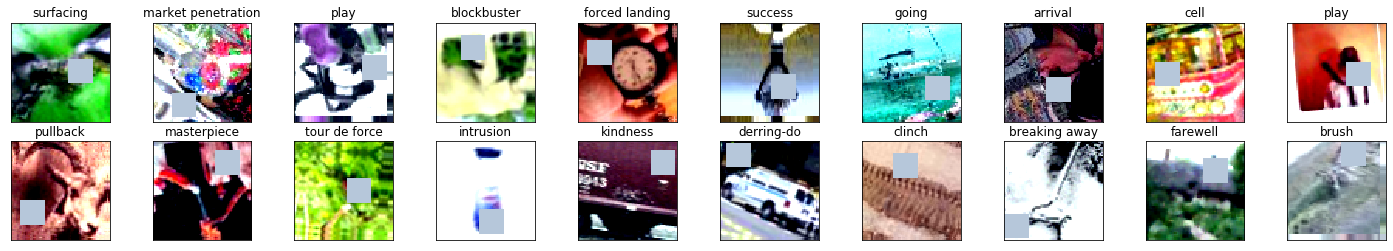

In [7]:
batch_size = 64
helper = TinyImagenetHelper()

path = helper.download_dataset(folder_path="data")
classes, id_dict = helper.get_classes(path)

test_loader, train_loader = helper.get_tiny_image_net_test_train_loader(id_dict, path, batch_size)

data_iterator = iter(train_loader)
plotdata.PlotData.showImagesfromdataset(data_iterator, values=classes, image_count=20, col=5)

In [8]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

cnn_model = torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)
train_model = train.TrainModel()
train_model.showmodelsummary(cnn_model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 16, 16]           9,408
       BatchNorm2d-2           [-1, 64, 16, 16]             128
              ReLU-3           [-1, 64, 16, 16]               0
         MaxPool2d-4             [-1, 64, 8, 8]               0
            Conv2d-5             [-1, 64, 8, 8]          36,864
       BatchNorm2d-6             [-1, 64, 8, 8]             128
              ReLU-7             [-1, 64, 8, 8]               0
            Conv2d-8             [-1, 64, 8, 8]          36,864
       BatchNorm2d-9             [-1, 64, 8, 8]             128
             ReLU-10             [-1, 64, 8, 8]               0
       BasicBlock-11             [-1, 64, 8, 8]               0
           Conv2d-12             [-1, 64, 8, 8]          36,864
      BatchNorm2d-13             [-1, 64, 8, 8]             128
             ReLU-14             [-1, 6

In [9]:
epochs = 21

In [10]:
lambda_fn = lambda epoch: (epoch * 0.6)
lr_data, class_correct, class_total = train_model.start_training_lr_finder(epochs=epochs, model=cnn_model, device=device, test_loader=test_loader, 
                                                                           train_loader=train_loader, lr=0.01, weight_decay=0, lambda_fn=lambda_fn)

  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 0
Learning rate = 0.0  for epoch:  0


Loss=5.571583271026611 Batch_id=1203 Accuracy=0.48: 100%|██████████| 1204/1204 [01:13<00:00, 16.35it/s] 



Test set: Average loss: 0.0867, Accuracy: 169/33000 (0.51%)

Validation accuracy increased (0.000000 --> 0.512121).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 1
Learning rate = 0.006  for epoch:  1


Loss=4.9741010665893555 Batch_id=1203 Accuracy=3.92: 100%|██████████| 1204/1204 [01:35<00:00, 12.58it/s]



Test set: Average loss: 0.0704, Accuracy: 2543/33000 (7.71%)

Validation accuracy increased (0.512121 --> 7.706061).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 2
Learning rate = 0.012  for epoch:  2


Loss=4.311164379119873 Batch_id=1203 Accuracy=7.57: 100%|██████████| 1204/1204 [01:46<00:00, 11.25it/s] 



Test set: Average loss: 0.0658, Accuracy: 3602/33000 (10.92%)

Validation accuracy increased (7.706061 --> 10.915152).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 3
Learning rate = 0.018  for epoch:  3


Loss=3.6743669509887695 Batch_id=1203 Accuracy=9.90: 100%|██████████| 1204/1204 [01:51<00:00, 10.76it/s]



Test set: Average loss: 0.0631, Accuracy: 4378/33000 (13.27%)

Validation accuracy increased (10.915152 --> 13.266667).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 4
Learning rate = 0.024  for epoch:  4


Loss=4.557459831237793 Batch_id=1203 Accuracy=11.84: 100%|██████████| 1204/1204 [01:57<00:00, 10.22it/s] 



Test set: Average loss: 0.0618, Accuracy: 4869/33000 (14.75%)

Validation accuracy increased (13.266667 --> 14.754545).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 5
Learning rate = 0.03  for epoch:  5


Loss=5.14369535446167 Batch_id=1203 Accuracy=13.42: 100%|██████████| 1204/1204 [02:02<00:00,  9.87it/s]  



Test set: Average loss: 0.0580, Accuracy: 5952/33000 (18.04%)

Validation accuracy increased (14.754545 --> 18.036364).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 6
Learning rate = 0.036  for epoch:  6


Loss=3.529132127761841 Batch_id=1203 Accuracy=15.19: 100%|██████████| 1204/1204 [02:02<00:00,  9.86it/s] 



Test set: Average loss: 0.0582, Accuracy: 6070/33000 (18.39%)

Validation accuracy increased (18.036364 --> 18.393939).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 7
Learning rate = 0.042  for epoch:  7


Loss=3.6344733238220215 Batch_id=1203 Accuracy=16.89: 100%|██████████| 1204/1204 [02:04<00:00,  9.69it/s]



Test set: Average loss: 0.0560, Accuracy: 6717/33000 (20.35%)

Validation accuracy increased (18.393939 --> 20.354545).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 8
Learning rate = 0.048  for epoch:  8


Loss=3.522090435028076 Batch_id=1203 Accuracy=18.34: 100%|██████████| 1204/1204 [02:08<00:00,  9.39it/s] 



Test set: Average loss: 0.0540, Accuracy: 7403/33000 (22.43%)

Validation accuracy increased (20.354545 --> 22.433333).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 9
Learning rate = 0.05399999999999999  for epoch:  9


Loss=4.092371940612793 Batch_id=1203 Accuracy=19.57: 100%|██████████| 1204/1204 [02:01<00:00,  9.87it/s] 



Test set: Average loss: 0.0525, Accuracy: 7940/33000 (24.06%)

Validation accuracy increased (22.433333 --> 24.060606).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 10
Learning rate = 0.06  for epoch:  10


Loss=4.032633304595947 Batch_id=1203 Accuracy=20.88: 100%|██████████| 1204/1204 [02:02<00:00,  9.85it/s] 
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0531, Accuracy: 7831/33000 (23.73%)

EPOCH: 11
Learning rate = 0.066  for epoch:  11


Loss=3.2262918949127197 Batch_id=1203 Accuracy=21.91: 100%|██████████| 1204/1204 [02:01<00:00,  9.87it/s]



Test set: Average loss: 0.0513, Accuracy: 8669/33000 (26.27%)

Validation accuracy increased (24.060606 --> 26.269697).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 12
Learning rate = 0.072  for epoch:  12


Loss=2.8208913803100586 Batch_id=1203 Accuracy=22.90: 100%|██████████| 1204/1204 [02:02<00:00,  9.82it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0514, Accuracy: 8481/33000 (25.70%)

EPOCH: 13
Learning rate = 0.078  for epoch:  13


Loss=5.21309757232666 Batch_id=1203 Accuracy=23.75: 100%|██████████| 1204/1204 [02:04<00:00,  9.67it/s]  



Test set: Average loss: 0.0494, Accuracy: 9256/33000 (28.05%)

Validation accuracy increased (26.269697 --> 28.048485).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 14
Learning rate = 0.084  for epoch:  14


Loss=4.1606974601745605 Batch_id=1203 Accuracy=24.71: 100%|██████████| 1204/1204 [02:03<00:00,  9.72it/s]



Test set: Average loss: 0.0490, Accuracy: 9427/33000 (28.57%)

Validation accuracy increased (28.048485 --> 28.566667).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 15
Learning rate = 0.09  for epoch:  15


Loss=2.810551166534424 Batch_id=1203 Accuracy=25.47: 100%|██████████| 1204/1204 [02:04<00:00,  9.63it/s] 



Test set: Average loss: 0.0488, Accuracy: 9530/33000 (28.88%)

Validation accuracy increased (28.566667 --> 28.878788).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 16
Learning rate = 0.096  for epoch:  16


Loss=2.820497751235962 Batch_id=1203 Accuracy=26.35: 100%|██████████| 1204/1204 [02:05<00:00,  9.60it/s] 



Test set: Average loss: 0.0482, Accuracy: 9887/33000 (29.96%)

Validation accuracy increased (28.878788 --> 29.960606).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 17
Learning rate = 0.102  for epoch:  17


Loss=4.137620449066162 Batch_id=1203 Accuracy=26.97: 100%|██████████| 1204/1204 [02:04<00:00,  9.66it/s] 



Test set: Average loss: 0.0473, Accuracy: 10070/33000 (30.52%)

Validation accuracy increased (29.960606 --> 30.515152).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 18
Learning rate = 0.10799999999999998  for epoch:  18


Loss=4.437066555023193 Batch_id=1203 Accuracy=27.72: 100%|██████████| 1204/1204 [02:03<00:00,  9.74it/s] 
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0482, Accuracy: 9978/33000 (30.24%)

EPOCH: 19
Learning rate = 0.114  for epoch:  19


Loss=3.3576602935791016 Batch_id=1203 Accuracy=28.40: 100%|██████████| 1204/1204 [02:09<00:00,  9.27it/s]



Test set: Average loss: 0.0466, Accuracy: 10480/33000 (31.76%)

Validation accuracy increased (30.515152 --> 31.757576).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 20
Learning rate = 0.12  for epoch:  20


Loss=3.37878680229187 Batch_id=1203 Accuracy=28.89: 100%|██████████| 1204/1204 [02:13<00:00,  9.04it/s]  



Test set: Average loss: 0.0467, Accuracy: 10560/33000 (32.00%)

Validation accuracy increased (31.757576 --> 32.000000).  Saving model ...
Saving final model after training cycle completion


In [13]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()

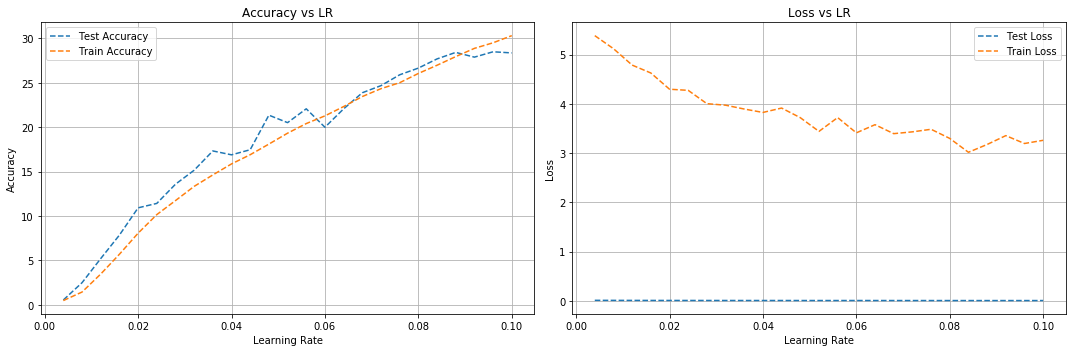

In [14]:
plotdata.PlotData.plotlrrangetestgraph(lr_data,test_acc,train_acc,test_losses,train_losses)

In [1]:
from src.imports import *

%config IPCompleter.greedy=True
%reload_ext autoreload

In [2]:
# lr_max = round(0.04935,5)
# lr_max = round(0.09200,5)
lr_max = round(0.088,5)
print("lrmax = {}".format(lr_max))
lr_min = round(lr_max / 1.3,5)
# lr_min = 0.06133
print("lrmin = {}".format(lr_min))
epochs = 20
maxlrepoch = 5

lrmax = 0.088
lrmin = 0.06769


100%|██████████| 200/200 [00:00<00:00, 2091.22it/s]
10000it [00:00, 800837.06it/s]

File: tiny-imagenet-200.zip already downloaded.
File: tiny-imagenet-200 already extracted.
Starting data loading
Finished data loading, in 0.11355352401733398 seconds
CUDA Available? True
64



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping 

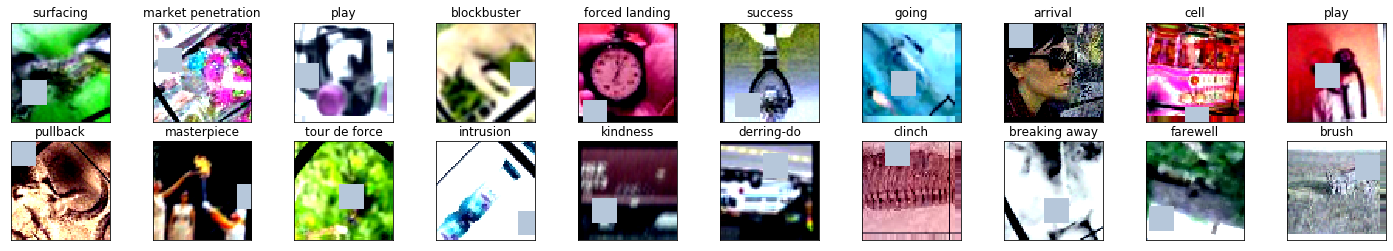

In [3]:
batch_size = 64
helper = TinyImagenetHelper()

path = helper.download_dataset(folder_path="data")
classes, id_dict = helper.get_classes(path)

test_loader, train_loader = helper.get_tiny_image_net_test_train_loader(id_dict, path, batch_size)

data_iterator = iter(train_loader)
plotdata.PlotData.showImagesfromdataset(data_iterator, values=classes, image_count=20, col=5)

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

cnn_model = torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)
train_model = train.TrainModel()

In [5]:
lr_data, class_correct, class_total = train_model.start_training_cyclic_lr(epochs,cnn_model,device,test_loader,train_loader,lr_min,lr_max,cycles=2,annealing=False)

  0%|          | 0/1204 [00:00<?, ?it/s]

Starting cycle: 1
EPOCH: 0
Learning rate = 0.06769  for epoch:  0


Loss=4.039945125579834 Batch_id=1203 Accuracy=3.59: 100%|██████████| 1204/1204 [01:07<00:00, 17.84it/s] 



Test set: Average loss: 0.0708, Accuracy: 2166/33000 (6.56%)

Validation accuracy increased (0.000000 --> 6.563636).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 1
Learning rate = 0.0727675  for epoch:  1


Loss=6.208488941192627 Batch_id=1203 Accuracy=7.84: 100%|██████████| 1204/1204 [01:26<00:00, 13.85it/s] 



Test set: Average loss: 0.0778, Accuracy: 2537/33000 (7.69%)

Validation accuracy increased (6.563636 --> 7.687879).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 2
Learning rate = 0.077845  for epoch:  2


Loss=5.206501007080078 Batch_id=1203 Accuracy=10.48: 100%|██████████| 1204/1204 [01:35<00:00, 12.61it/s] 



Test set: Average loss: 0.0621, Accuracy: 4687/33000 (14.20%)

Validation accuracy increased (7.687879 --> 14.203030).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 3
Learning rate = 0.0829225  for epoch:  3


Loss=4.407121181488037 Batch_id=1203 Accuracy=12.59: 100%|██████████| 1204/1204 [01:35<00:00, 12.55it/s] 



Test set: Average loss: 0.0608, Accuracy: 5419/33000 (16.42%)

Validation accuracy increased (14.203030 --> 16.421212).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 4
Learning rate = 0.088  for epoch:  4


Loss=4.207549095153809 Batch_id=1203 Accuracy=14.36: 100%|██████████| 1204/1204 [01:43<00:00, 11.69it/s] 



Test set: Average loss: 0.0591, Accuracy: 5890/33000 (17.85%)

Validation accuracy increased (16.421212 --> 17.848485).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 5
Learning rate = 0.086646  for epoch:  5


Loss=4.440443515777588 Batch_id=1203 Accuracy=16.15: 100%|██████████| 1204/1204 [01:49<00:00, 11.02it/s] 



Test set: Average loss: 0.0562, Accuracy: 6743/33000 (20.43%)

Validation accuracy increased (17.848485 --> 20.433333).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 6
Learning rate = 0.08529199999999999  for epoch:  6


Loss=3.8967998027801514 Batch_id=1203 Accuracy=17.75: 100%|██████████| 1204/1204 [01:47<00:00, 11.16it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0561, Accuracy: 6690/33000 (20.27%)

EPOCH: 7
Learning rate = 0.083938  for epoch:  7


Loss=3.7540743350982666 Batch_id=1203 Accuracy=19.25: 100%|██████████| 1204/1204 [01:57<00:00, 10.22it/s]



Test set: Average loss: 0.0531, Accuracy: 7874/33000 (23.86%)

Validation accuracy increased (20.433333 --> 23.860606).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 8
Learning rate = 0.08258399999999999  for epoch:  8


Loss=3.9855008125305176 Batch_id=1203 Accuracy=20.71: 100%|██████████| 1204/1204 [01:51<00:00, 10.83it/s]



Test set: Average loss: 0.0534, Accuracy: 7913/33000 (23.98%)

Validation accuracy increased (23.860606 --> 23.978788).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 9
Learning rate = 0.08123  for epoch:  9


Loss=5.048747539520264 Batch_id=1203 Accuracy=21.73: 100%|██████████| 1204/1204 [01:54<00:00, 10.49it/s] 



Test set: Average loss: 0.0528, Accuracy: 8142/33000 (24.67%)

Validation accuracy increased (23.978788 --> 24.672727).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 10
Learning rate = 0.079876  for epoch:  10


Loss=4.239123821258545 Batch_id=1203 Accuracy=23.06: 100%|██████████| 1204/1204 [01:53<00:00, 10.62it/s] 



Test set: Average loss: 0.0509, Accuracy: 8769/33000 (26.57%)

Validation accuracy increased (24.672727 --> 26.572727).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 11
Learning rate = 0.078522  for epoch:  11


Loss=4.049299716949463 Batch_id=1203 Accuracy=24.34: 100%|██████████| 1204/1204 [01:52<00:00, 10.74it/s] 



Test set: Average loss: 0.0504, Accuracy: 9040/33000 (27.39%)

Validation accuracy increased (26.572727 --> 27.393939).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 12
Learning rate = 0.077168  for epoch:  12


Loss=3.268169403076172 Batch_id=1203 Accuracy=25.37: 100%|██████████| 1204/1204 [01:46<00:00, 11.28it/s] 



Test set: Average loss: 0.0495, Accuracy: 9413/33000 (28.52%)

Validation accuracy increased (27.393939 --> 28.524242).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 13
Learning rate = 0.07581399999999999  for epoch:  13


Loss=4.223336219787598 Batch_id=1203 Accuracy=26.45: 100%|██████████| 1204/1204 [01:48<00:00, 11.12it/s] 



Test set: Average loss: 0.0488, Accuracy: 9738/33000 (29.51%)

Validation accuracy increased (28.524242 --> 29.509091).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 14
Learning rate = 0.07446  for epoch:  14


Loss=3.8477072715759277 Batch_id=1203 Accuracy=27.40: 100%|██████████| 1204/1204 [01:54<00:00, 10.49it/s]



Test set: Average loss: 0.0476, Accuracy: 10042/33000 (30.43%)

Validation accuracy increased (29.509091 --> 30.430303).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 15
Learning rate = 0.073106  for epoch:  15


Loss=2.9599242210388184 Batch_id=1203 Accuracy=28.18: 100%|██████████| 1204/1204 [01:55<00:00, 10.41it/s]



Test set: Average loss: 0.0473, Accuracy: 10349/33000 (31.36%)

Validation accuracy increased (30.430303 --> 31.360606).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 16
Learning rate = 0.071752  for epoch:  16


Loss=2.377066135406494 Batch_id=1203 Accuracy=29.29: 100%|██████████| 1204/1204 [01:52<00:00, 10.68it/s] 



Test set: Average loss: 0.0470, Accuracy: 10395/33000 (31.50%)

Validation accuracy increased (31.360606 --> 31.500000).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 17
Learning rate = 0.070398  for epoch:  17


Loss=3.282957077026367 Batch_id=1203 Accuracy=30.10: 100%|██████████| 1204/1204 [01:58<00:00, 10.16it/s] 



Test set: Average loss: 0.0465, Accuracy: 10680/33000 (32.36%)

Validation accuracy increased (31.500000 --> 32.363636).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 18
Learning rate = 0.069044  for epoch:  18


Loss=2.3047847747802734 Batch_id=1203 Accuracy=30.99: 100%|██████████| 1204/1204 [01:56<00:00, 10.29it/s]



Test set: Average loss: 0.0456, Accuracy: 10997/33000 (33.32%)

Validation accuracy increased (32.363636 --> 33.324242).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 19
Learning rate = 0.06769  for epoch:  19


Loss=2.8752150535583496 Batch_id=1203 Accuracy=31.88: 100%|██████████| 1204/1204 [01:55<00:00, 10.42it/s]



Test set: Average loss: 0.0466, Accuracy: 10841/33000 (32.85%)

Saving final model after training cycle completion


  0%|          | 0/1204 [00:00<?, ?it/s]

Completed cycle: 1
Starting cycle: 2
EPOCH: 0
Learning rate = 0.06769  for epoch:  0


Loss=4.009945392608643 Batch_id=1203 Accuracy=32.44: 100%|██████████| 1204/1204 [01:52<00:00, 10.70it/s] 
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0462, Accuracy: 10961/33000 (33.22%)

EPOCH: 1
Learning rate = 0.0727675  for epoch:  1


Loss=2.938004970550537 Batch_id=1203 Accuracy=32.85: 100%|██████████| 1204/1204 [01:58<00:00, 10.12it/s] 



Test set: Average loss: 0.0453, Accuracy: 11254/33000 (34.10%)

Validation accuracy increased (33.324242 --> 34.103030).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 2
Learning rate = 0.077845  for epoch:  2


Loss=3.232247829437256 Batch_id=1203 Accuracy=33.32: 100%|██████████| 1204/1204 [02:00<00:00, 10.02it/s] 



Test set: Average loss: 0.0455, Accuracy: 11331/33000 (34.34%)

Validation accuracy increased (34.103030 --> 34.336364).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 3
Learning rate = 0.0829225  for epoch:  3


Loss=3.3566675186157227 Batch_id=1203 Accuracy=33.26: 100%|██████████| 1204/1204 [01:57<00:00, 10.27it/s]



Test set: Average loss: 0.0449, Accuracy: 11531/33000 (34.94%)

Validation accuracy increased (34.336364 --> 34.942424).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 4
Learning rate = 0.088  for epoch:  4


Loss=3.1642892360687256 Batch_id=1203 Accuracy=33.56: 100%|██████████| 1204/1204 [01:52<00:00, 10.72it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0467, Accuracy: 11052/33000 (33.49%)

EPOCH: 5
Learning rate = 0.086646  for epoch:  5


Loss=3.0112545490264893 Batch_id=1203 Accuracy=34.36: 100%|██████████| 1204/1204 [02:01<00:00,  9.92it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0461, Accuracy: 11344/33000 (34.38%)

EPOCH: 6
Learning rate = 0.08529199999999999  for epoch:  6


Loss=3.3642263412475586 Batch_id=1203 Accuracy=35.34: 100%|██████████| 1204/1204 [02:04<00:00,  9.70it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0459, Accuracy: 11216/33000 (33.99%)

EPOCH: 7
Learning rate = 0.083938  for epoch:  7


Loss=4.336651802062988 Batch_id=1203 Accuracy=36.00: 100%|██████████| 1204/1204 [02:01<00:00,  9.88it/s] 



Test set: Average loss: 0.0453, Accuracy: 11586/33000 (35.11%)

Validation accuracy increased (34.942424 --> 35.109091).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 8
Learning rate = 0.08258399999999999  for epoch:  8


Loss=3.439880847930908 Batch_id=1203 Accuracy=36.84: 100%|██████████| 1204/1204 [02:01<00:00,  9.90it/s] 
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0457, Accuracy: 11501/33000 (34.85%)

EPOCH: 9
Learning rate = 0.08123  for epoch:  9


Loss=2.563152551651001 Batch_id=1203 Accuracy=37.48: 100%|██████████| 1204/1204 [01:58<00:00, 10.18it/s] 



Test set: Average loss: 0.0452, Accuracy: 11788/33000 (35.72%)

Validation accuracy increased (35.109091 --> 35.721212).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 10
Learning rate = 0.079876  for epoch:  10


Loss=2.1648001670837402 Batch_id=1203 Accuracy=38.39: 100%|██████████| 1204/1204 [01:58<00:00, 10.16it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0452, Accuracy: 11726/33000 (35.53%)

EPOCH: 11
Learning rate = 0.078522  for epoch:  11


Loss=2.4821367263793945 Batch_id=1203 Accuracy=39.16: 100%|██████████| 1204/1204 [01:58<00:00, 10.17it/s]



Test set: Average loss: 0.0450, Accuracy: 11975/33000 (36.29%)

Validation accuracy increased (35.721212 --> 36.287879).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 12
Learning rate = 0.077168  for epoch:  12


Loss=2.2366762161254883 Batch_id=1203 Accuracy=39.93: 100%|██████████| 1204/1204 [01:56<00:00, 10.32it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0459, Accuracy: 11720/33000 (35.52%)

EPOCH: 13
Learning rate = 0.07581399999999999  for epoch:  13


Loss=3.0866236686706543 Batch_id=1203 Accuracy=41.09: 100%|██████████| 1204/1204 [02:02<00:00,  9.83it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0453, Accuracy: 11965/33000 (36.26%)

EPOCH: 14
Learning rate = 0.07446  for epoch:  14


Loss=3.2322897911071777 Batch_id=1203 Accuracy=41.53: 100%|██████████| 1204/1204 [01:56<00:00, 10.32it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0461, Accuracy: 11852/33000 (35.92%)

EPOCH: 15
Learning rate = 0.073106  for epoch:  15


Loss=3.139829397201538 Batch_id=1203 Accuracy=42.34: 100%|██████████| 1204/1204 [02:04<00:00,  9.66it/s] 
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0458, Accuracy: 11901/33000 (36.06%)

EPOCH: 16
Learning rate = 0.071752  for epoch:  16


Loss=1.983577847480774 Batch_id=1203 Accuracy=43.33: 100%|██████████| 1204/1204 [02:03<00:00,  9.78it/s] 



Test set: Average loss: 0.0460, Accuracy: 12087/33000 (36.63%)

Validation accuracy increased (36.287879 --> 36.627273).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 17
Learning rate = 0.070398  for epoch:  17


Loss=2.9920895099639893 Batch_id=1203 Accuracy=44.02: 100%|██████████| 1204/1204 [02:03<00:00,  9.78it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0464, Accuracy: 11977/33000 (36.29%)

EPOCH: 18
Learning rate = 0.069044  for epoch:  18


Loss=3.0060534477233887 Batch_id=1203 Accuracy=45.02: 100%|██████████| 1204/1204 [02:02<00:00,  9.83it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0473, Accuracy: 11948/33000 (36.21%)

EPOCH: 19
Learning rate = 0.06769  for epoch:  19


Loss=2.3064332008361816 Batch_id=1203 Accuracy=45.85: 100%|██████████| 1204/1204 [02:07<00:00,  9.45it/s]



Test set: Average loss: 0.0469, Accuracy: 12051/33000 (36.52%)

Saving final model after training cycle completion
Completed cycle: 2


In [6]:
# lr_data, class_correct, class_total = train.start_training(optimizer, scheduler, epochs, cnn_model, device, test_loader, train_loader)

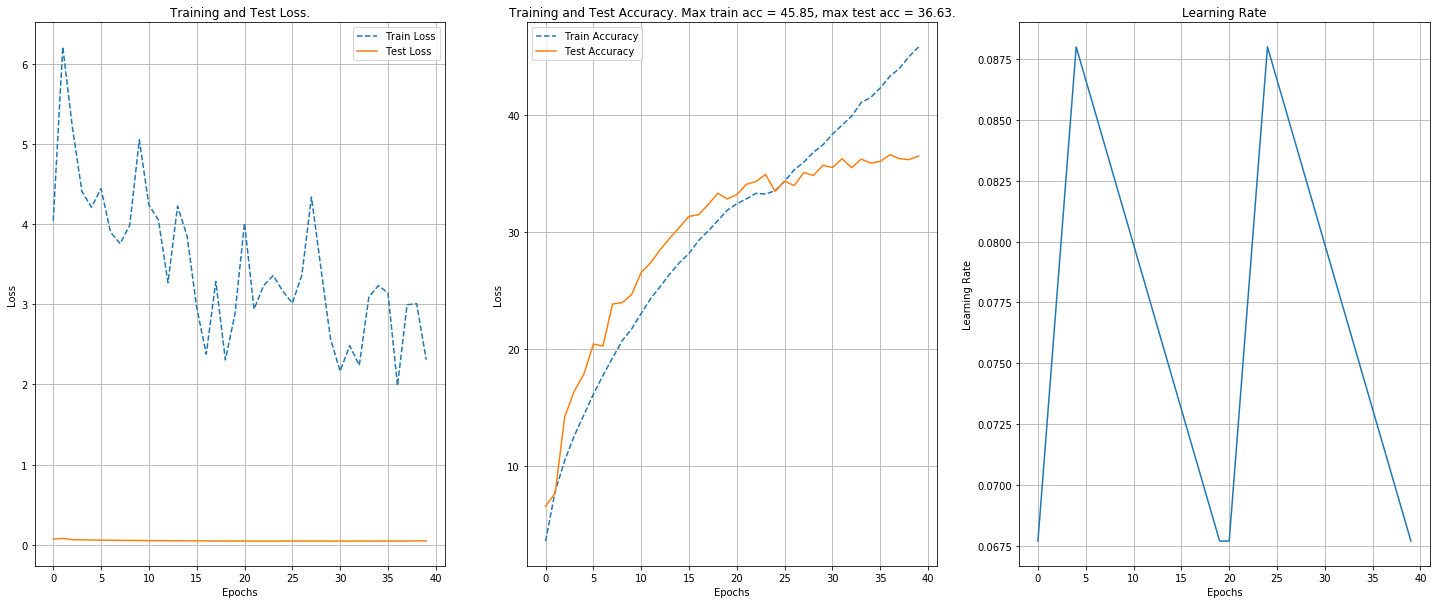

In [7]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
plotdata.PlotData.plottesttraingraph(train_losses=train_losses,train_acc=train_acc,test_losses=test_losses,
                                     test_acc=test_acc,lr_data=lr_data, plotonsamegraph=True,epochs=epochs,doProcessArray=False)

In [10]:
import torch
import src.utils.utils as utils
import src.preprocessing.albumentationstransforms as preprocessing
preproc = preprocessing.AlbumentaionsTransforms()
import src.preprocessing.preprochelper as preprochelper
import glob
from PIL import Image
from src.utils.modelutils import *
import src.visualization.plotdata as plotdata
import src.dataset.dataset as dst
import src.dataset.dataloader as dl
import src.preprocessing.customcompose as customcompose
import src.train.train_model as train
import torch
from torch.utils.tensorboard import SummaryWriter
import torchvision
from src.visualization.tensorboard.tensorboardhelper import TensorboardHelper

%load_ext tensorboard

In [11]:
print(torch.cuda.is_available())
saved_data, epoch, model_state_dict, optimizer_state_dict, train_losses, train_acc, test_losses, test_acc\
            , test_losses, lr_data, class_correct, class_total\
= utils.Utils.loadmodel(path="savedmodels/finalmodelwithdata.pt")

True


In [12]:
model, device = utils.Utils.createA11CustomResnetModel(model_state_dict=model_state_dict)

cuda


In [13]:
train_transforms, test_transforms = preprochelper.PreprocHelper.getpytorchtransforms((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
ds = dst.Dataset()
train_dataset = ds.gettraindataset(train_transforms)
test_dataset = ds.gettestdataset(test_transforms)

batch_size = 512
dataloader = dl.Cifar10Dataloader(traindataset=train_dataset, testdataset=test_dataset,batch_size=batch_size)
test_loader = dataloader.gettestdataloader()
train_loader = dataloader.gettraindataloader()

# obtain one batch of test images
dataiterator = iter(test_loader)
# specify the image classes
classes = ds.getclassesinCIFAR10dataset()



Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True
512


In [14]:
classified, misclassified = train.TrainModel.getinferredimagesfromdataset(dataiterator=dataiterator, model=model,
                                                                          classes=classes, batch_size=batch_size,
                                                                          number=2)

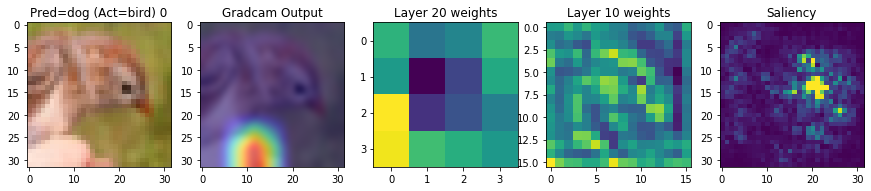

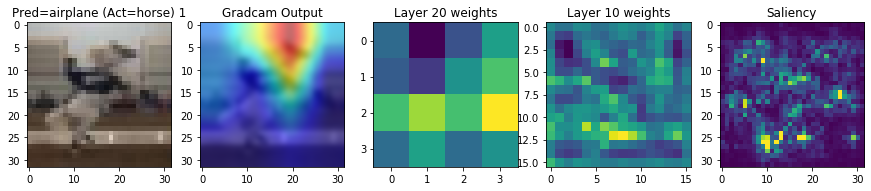

In [15]:
plotdata.PlotData.plotinferredimagesfromdataset(misclassified, model, device, classes,"misclassifed"
                                                ,size=(15,20),layerNo=20)

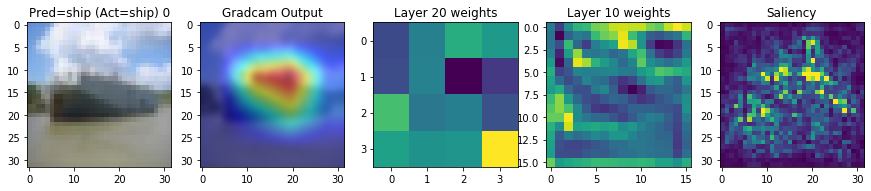

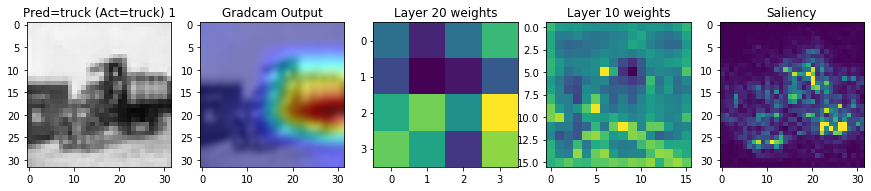

In [16]:
plotdata.PlotData.plotinferredimagesfromdataset(classified, model, device, classes,"correct"
                                                ,size=(15,20),layerNo=20)

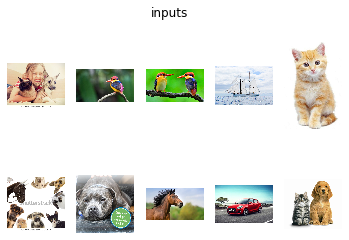

In [17]:
# from src.utils.modelutils import subplot
image_paths = glob.glob('./images/testimages/*.*')
images = list(map(lambda x: Image.open(x), image_paths))
subplot(images, title='inputs', nrows=2, ncols=5)

In [18]:
inputs = [torchvision.transforms.Compose([torchvision.transforms.Resize((32, 32)), torchvision.transforms.ToTensor(),
                                          torchvision.transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])(
    x).unsqueeze(0) for x in images]  # add 1 dim for batch
inputs = [i.to(device) for i in inputs]

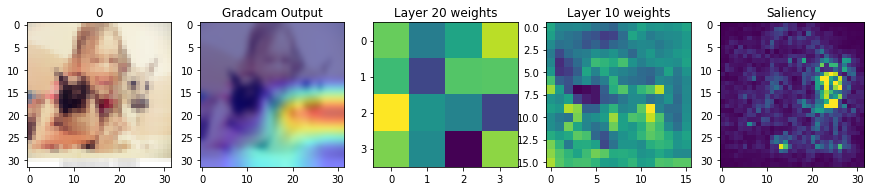

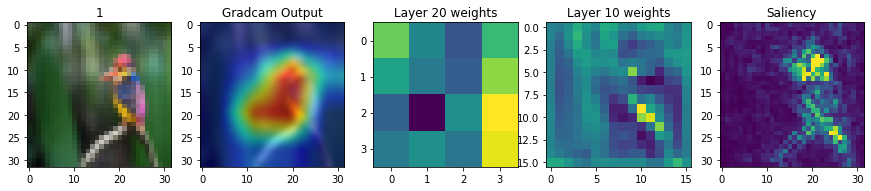

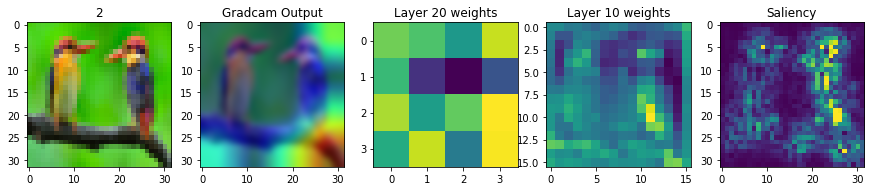

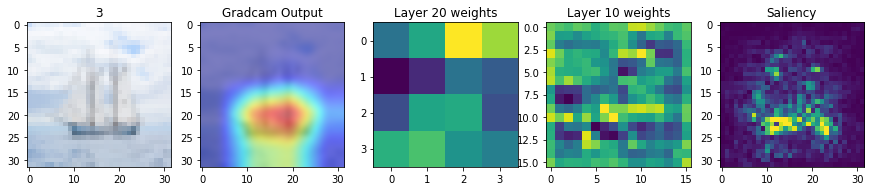

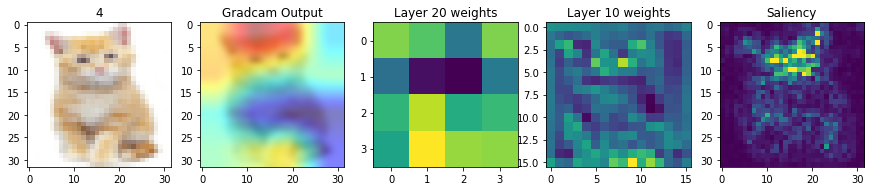

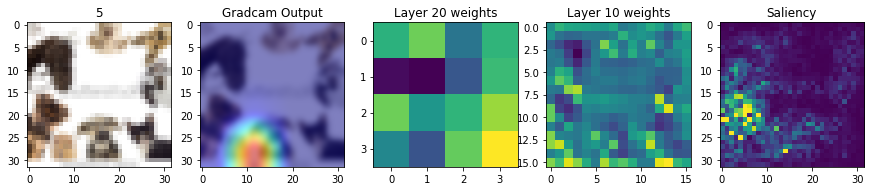

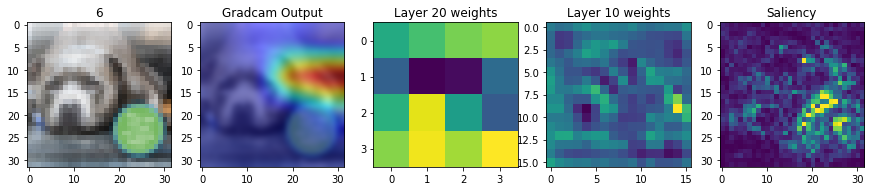

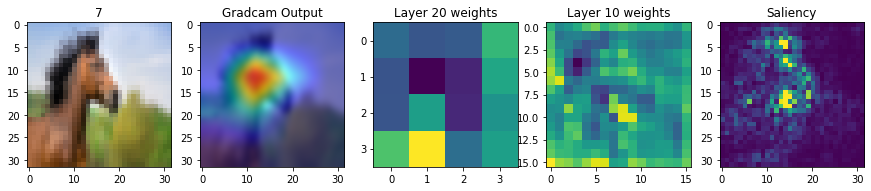

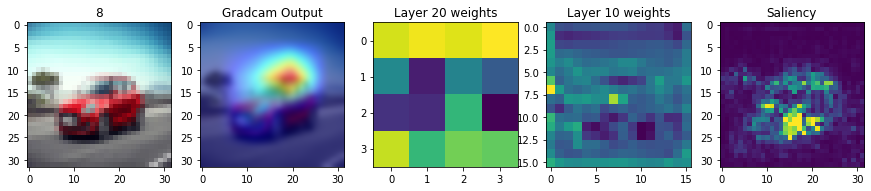

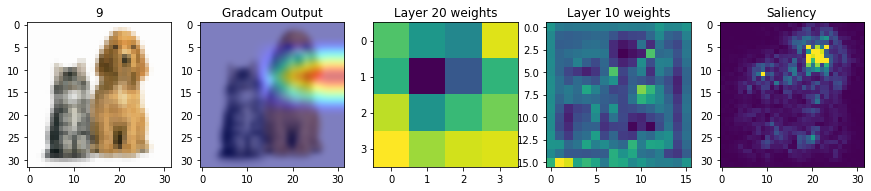

In [19]:
from src.visualization.gradcam.gradcam import GradCam
from src.visualization.gradcam import gradcamhelper

# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']


# print("Gradcam of external images for Layer 34, Conv2d, Output Shape = 8")
loc = 0
for input in inputs:  
    dict = {loc:input}
    plotdata.PlotData.plotinferredimagesfromdataset(dict, model, device, classes,"external"
                                                ,size=(15,20),layerNo=20)
    loc += 1


In [20]:
images, labels = next(iter(train_loader))

In [21]:
# model, device = utils.Utils.createmodelresnet18(model_state_dict=model_state_dict)
images, labels = images.to(device), labels.to(device)
grid = torchvision.utils.make_grid(images)

In [22]:
epochs = epoch

In [23]:
writer = SummaryWriter("customresnet_onecycle_A11")
writer.add_image('images', grid, 0)
writer.add_graph(model, images)

In [24]:
print(epochs)
for epoch in range(0, epochs):
    writer.add_scalars('Loss', {'Train': train_losses[epoch],'Test': test_losses[epoch],}, epoch+1)
    writer.add_scalars('Accuracy', {'Train': train_acc[epoch],'Test': test_acc[epoch],}, epoch+1)
    writer.add_scalar('LR', lr_data[epoch], epoch+1)
    writer.add_histogram('Test Accuracy distribution', test_acc[epoch], epoch+1)
    writer.add_histogram('Test Loss distribution', test_losses[epoch], epoch+1)
    writer.add_histogram('Train Accuracy distribution', train_acc[epoch], epoch+1)
    writer.add_histogram('Train Loss distribution', train_losses[epoch], epoch+1)
    
writer.close()

24


In [28]:
tensorboard --logdir=customresnet_onecycle_A11

In [32]:
# torch.cuda.empty_cache()

# test_dataset = None
# train_dataset = None
# test_loader = None
# train_loader = None

# import gc
# gc.collect()

43061

In [27]:
!kill 27460